In [16]:
import cv2
import imutils
import requests
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image

import pytesseract
from pytesseract import Output

import googletrans
from googletrans import Translator

from PIL import Image, ImageFont, ImageDraw
from timm.models.hub import download_cached_file
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours

plt.style.use('seaborn')
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
MODEL_URL = "https://github.com/Boram3J/image-editing/releases/download/inpainting/big-lama-344c77bb.pt"
device = "cuda"

In [17]:
def plt_imshow(title='image', img=None, figsize=(10, 8)):
    """이미지 확인"""
    plt.figure(figsize=figsize)
    rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(rgbImg)
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()


def load_model(device="cpu", progress=True):
    model_path = download_cached_file(MODEL_URL, progress=progress)
    model = torch.jit.load(model_path, map_location="cpu")
    model.to(device)
    model.eval()

    return model

In [3]:
image_nparray = np.asarray(bytearray(requests.get(img_url).content),
                           dtype=np.uint8)

NameError: name 'img_url' is not defined

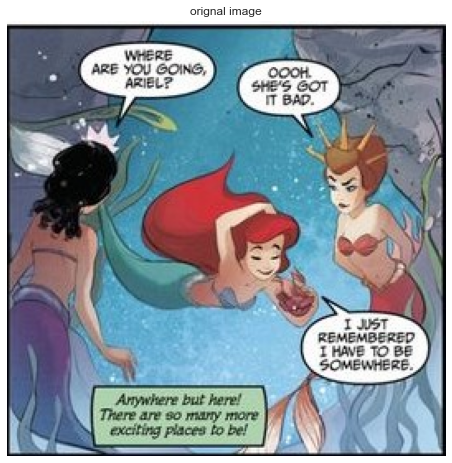

In [18]:
img = cv2.imread('../images/cartoon1.jpg')
org_image = np.asarray(img, dtype=np.uint8)
plt_imshow("orignal image", org_image)

In [9]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "../EDSR_x4.pb"
sr.readModel(path)
sr.setModel("edsr",4)
result = sr.upsample(org_image)

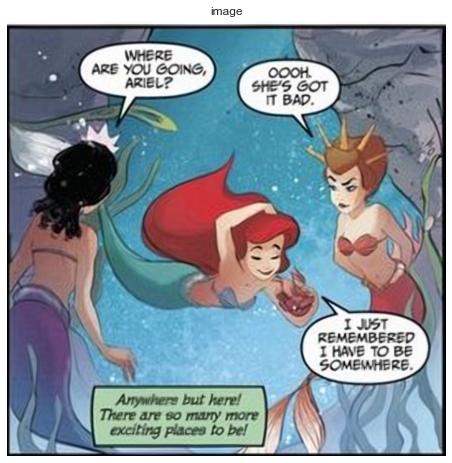

In [19]:
plt_imshow(img=result)

In [51]:
results = pytesseract.image_to_data(result, output_type=Output.DICT)

In [52]:
translator = Translator(service_urls=[
    'translate.google.com',
    'translate.google.co.kr',
])

In [77]:
fontpath = "C:/Windows/Fonts/Malgun.TTF"
font = ImageFont.truetype(fontpath, 30)

In [61]:
transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
])

In [62]:
torch.manual_seed(1)
model = load_model(device=device)

In [83]:
pytesseract.image_to_string(result)

'WHERE\nARE YOU GOING,\nARIEL?\n\nREMEMBERED\nI HAVE TO BE\n'

In [85]:
!pwd

/c/Users/HP/Downloads/workspaces/team-project/image-editing/EDA


In [78]:
img = Image.fromarray(result)
draw = ImageDraw.Draw(img)

temp = 0
for i in range(0, len(results["text"])):
    text = results["text"][i]
    conf = float(results["conf"][i])
    
    if not conf > 95.:
        continue
    
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]
    
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    trans = translator.translate(text, src='en', dest='ko')
    text = trans.text
    
    draw.rectangle([(x, y), (x + w, y + h)], (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.text((x, y), text, font=font, fill=(0, 0, 0))

    temp += 1
    if temp == 5:
        break

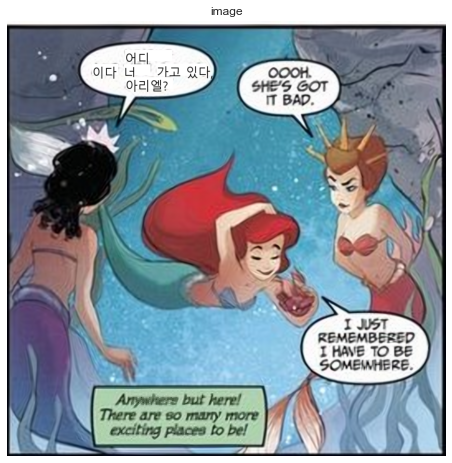

In [79]:
img = np.array(img)
plt_imshow(img=img)